In [252]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(H):
    return np.exp(H)/np.sum(np.exp(H),axis=1,keepdims=1)

In [573]:
class ClassifierNeuralNetwork3():
    def __init__(self,InputColumns,OutputColumns,Layer1Nodes,Layer2Nodes):
        self.Costs=[]
        self.weights0=np.random.randn(InputColumns,Layer1Nodes)
        self.bias0=np.random.randn(1,Layer1Nodes)
        self.mu0=np.zeros((1,Layer1Nodes))
        self.sigma0=np.ones((1,Layer1Nodes))
        self.gamma0=np.ones((1,Layer1Nodes))
        self.beta0=np.zeros((1,Layer1Nodes))
        self.weights1=np.random.randn(Layer1Nodes,Layer2Nodes)
        self.bias1=np.random.randn(1,Layer2Nodes)
        self.mu1=np.zeros((1,Layer2Nodes))
        self.sigma1 = np.ones((1,Layer2Nodes))
        self.gamma1=np.ones((1,Layer2Nodes))
        self.beta1=np.zeros((1,Layer2Nodes))
        self.weights2=np.random.randn(Layer2Nodes,OutputColumns)
        self.mu2=np.zeros((1,OutputColumns))
        self.sigma2=np.ones((1,OutputColumns))
        self.bias2=np.random.randn(1,OutputColumns)
        self.gamma2 = np.ones((1,OutputColumns))
        self.beta2 = np.zeros((1,OutputColumns))
    
    def forward(self,Input,alpha=0.1,p=0.1):
        self.H0 = Input@self.weights0 + self.bias0
        self.mu0=alpha*(np.mean(self.H0,axis=0,keepdims=1))+(1-alpha)*self.mu0
        self.sigma0=alpha*(np.var(self.H0,axis=0,keepdims=1))+(1-alpha)*self.sigma0
        self.Hbar0 = (self.gamma0*((self.H0-self.mu0)/
                                   np.sqrt(self.sigma0+1e-10))+
                      self.beta0)
        self.Z0 = np.tanh(self.Hbar0)*(np.random.rand(self.Hbar0.shape[0],self.Hbar0.shape[1])>p)
        self.H1 = self.Z0@self.weights1 + self.bias1
        
        self.mu1=alpha*(np.mean(self.H1,axis=0,keepdims=1))+(1-alpha)*self.mu1
        self.sigma1=alpha*(np.var(self.H1,axis=0,keepdims=1))+(1-alpha)*self.sigma1
        self.Hbar1 = (self.gamma1*((self.H1-self.mu1)/
                                   np.sqrt(self.sigma1+1e-10))+
                      self.beta1)
        self.Z1 = np.tanh(self.Hbar1)*(np.random.rand(self.Hbar1.shape[0],self.Hbar1.shape[1])>p)
        self.H2 = self.Z1@self.weights2 + self.bias2
        self.mu2=alpha*(np.mean(self.H2,axis=0,keepdims=1))+(1-alpha)*self.mu2
        self.sigma2=alpha*(np.var(self.H2,axis=0,keepdims=1))+(1-alpha)*self.sigma2
        
        self.Hbar2 = (self.gamma2*((self.H2-self.mu2)/
                                   np.sqrt(self.sigma2+1e-10))+
                      self.beta2)
        self.Output = softmax(self.Hbar2)
        #return self.Output
        
    def predict(self,Input,alpha=0,returnOutput=True):
        
        self.H0 = Input@self.weights0 + self.bias0
        self.mu0=alpha*(np.mean(self.H0,axis=0,keepdims=1))+(1-alpha)*self.mu0
        self.sigma0=alpha*(np.var(self.H0,axis=0,keepdims=1))+(1-alpha)*self.sigma0
        self.Hbar0 = (self.gamma0*((self.H0-self.mu0)/
                                   np.sqrt(self.sigma0+1e-10))+
                      self.beta0)
        self.Z0 = np.tanh(self.Hbar0)*(self.prob)
        self.H1 = self.Z0@self.weights1 + self.bias1
        
        self.mu1=alpha*(np.mean(self.H1,axis=0,keepdims=1))+(1-alpha)*self.mu1
        self.sigma1=alpha*(np.var(self.H1,axis=0,keepdims=1))+(1-alpha)*self.sigma1
        self.Hbar1 = (self.gamma1*((self.H1-self.mu1)/
                                   np.sqrt(self.sigma1+1e-10))+
                      self.beta1)
        self.Z1 = np.tanh(self.Hbar1)*(self.prob)
        self.H2 = self.Z1@self.weights2 + self.bias2
        self.mu2=alpha*(np.mean(self.H2,axis=0,keepdims=1))+(1-alpha)*self.mu2
        self.sigma2=alpha*(np.var(self.H2,axis=0,keepdims=1))+(1-alpha)*self.sigma2
        
        self.Hbar2 = (self.gamma2*((self.H2-self.mu2)/
                                   np.sqrt(self.sigma2+1e-10))+
                      self.beta2)
        self.Output = softmax(self.Hbar2)
        if returnOutput:
            return self.Output
    
    def backward(self,Input,Output):
        self.gradHbar2 = self.Output-Output
        self.gradgamma2 = np.sum(self.gradHbar2*((self.H2-self.mu2)/
                                                 (np.sqrt(self.sigma2+1e-10))),
                                 axis=0,
                                 keepdims=1)
        self.gradbeta2 = np.sum(self.gradHbar2,axis=0,keepdims=1)
        self.gradLogits2 = (self.gradHbar2*(self.gamma2/(np.sqrt(self.sigma2+1e-10))))
        self.gradweights2 = self.Z1.T@(self.gradLogits2)
        self.gradbias2 = np.sum(self.gradLogits2,axis=0,keepdims=1)
        
        self.gradHbar1 = self.gradLogits2@self.weights2.T
        self.gradgamma1 = np.sum(self.gradHbar1*((self.H1-self.mu1)/
                                                 (np.sqrt(self.sigma1+1e-10))),
                                 axis=0,
                                 keepdims=1)
        self.gradbeta1 = np.sum(self.gradHbar1,axis=0,keepdims=1)
        self.gradLogits1 = (self.gradHbar1*(self.gamma1/(np.sqrt(self.sigma1+1e-10))))
        self.gradweights1 = self.Z0.T@(self.gradLogits1)
        self.gradbias1 = np.sum(self.gradLogits1,axis=0,keepdims=1)
        
        self.gradHbar0 = self.gradLogits1@self.weights1.T
        self.gradgamma0 = np.sum(self.gradHbar0*((self.H0-self.mu0)/
                                                 (np.sqrt(self.sigma0+1e-10))),
                                 axis=0,
                                 keepdims=1)
        self.gradbeta0 = np.sum(self.gradHbar0,axis=0,keepdims=1)
        self.gradLogits0 = (self.gradHbar0*(self.gamma0/(np.sqrt(self.sigma0+1e-10))))
        self.gradweights0 = Input.T@(self.gradLogits0)
        self.gradbias0 = np.sum(self.gradLogits0,axis=0,keepdims=1)
        
        
    def fit(self,eta,epochs,X,Y,verbose=False,alpha=0.1,beta=0.001,lamb=0.15,p=0.1):
        self.prob=p
        for i in range(epochs):
            self.forward(X,alpha,p)
            self.backward(X,Y)
            self.predict(X,alpha,returnOutput=False)
            self.Costs.append(-(Y*np.log(self.Output)).sum())
            if verbose:
                print('Iteration: {}, Cost:{}'.format(i+1,self.Costs[-1]))
            self.gamma2-=eta*self.gradgamma2+beta*lamb*np.sign(self.gamma2)+beta*(1-lamb)*self.gamma2
            self.beta2-=eta*self.gradbeta2+beta*lamb*np.sign(self.beta2)+beta*(1-lamb)*self.beta2
            self.weights2-=eta*self.gradweights2+beta*lamb*np.sign(self.weights2)+beta*(1-lamb)*self.weights2
            self.bias2-=eta*self.gradbias2+beta*lamb*np.sign(self.bias2)+beta*(1-lamb)*self.bias2
            self.gamma1-=eta*self.gradgamma1+beta*lamb*np.sign(self.gamma1)+beta*(1-lamb)*self.gamma1
            self.beta1-=eta*self.gradbeta1+beta*lamb*np.sign(self.beta1)+beta*(1-lamb)*self.beta1
            self.weights1-=eta*self.gradweights1+beta*lamb*np.sign(self.weights1)+beta*(1-lamb)*self.weights1
            self.bias1-=eta*self.gradbias1+beta*lamb*np.sign(self.bias1)+beta*(1-lamb)*self.bias1
            self.gamma0-=eta*self.gradgamma0+beta*lamb*np.sign(self.gamma0)+beta*(1-lamb)*self.gamma0
            self.beta0-=eta*self.gradbeta0+beta*lamb*np.sign(self.beta0)+beta*(1-lamb)*self.beta0
            self.weights0-=eta*self.gradweights0+beta*lamb*np.sign(self.weights0)+beta*(1-lamb)*self.weights0
            self.bias0-=eta*self.gradbias0+beta*lamb*np.sign(self.bias0)+beta*(1-lamb)*self.bias0
        

In [574]:
N = 500
b = 5
Data = np.vstack((np.hstack((np.random.randn(N,2)+[[b,b]],[[1,0,0]]*N)),
                  np.hstack((np.random.randn(N,2)+[[-b,0]],[[0,1,0]]*N)),
                  np.hstack((np.random.randn(N,2)+[[b,-b]],[[0,0,1]]*N))))

np.random.shuffle(Data)
Data[150:153,:2] = Data[150:153,:2]+[[5,5]]

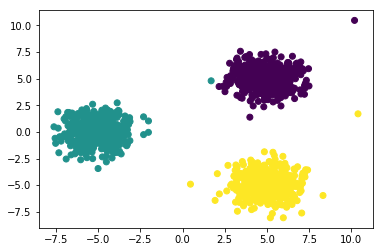

In [575]:
plt.scatter(Data[:,0],Data[:,1],c=np.argmax(Data[:,2:],axis=1))

In [576]:
np.random.shuffle(Data)
model = ClassifierNeuralNetwork3(InputColumns=2,OutputColumns=3,Layer1Nodes=5,Layer2Nodes=5)

In [577]:
batch = 10
for _ in range(20000):
    Sample = Data[np.random.choice(np.arange(Data.shape[0]),size=batch,replace=0)]
    model.fit(eta=1e-4,epochs=1,X=Sample[:,:2],Y=Sample[:,2:],verbose=0,beta=0,lamb=0,p=0.5)

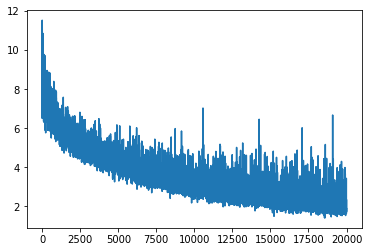

In [578]:
plt.plot(model.Costs)

In [565]:
simX = (np.random.rand(10000,2)-0.5)*(Data[:,:2].max(axis=0,keepdims=True)-Data[:,:2].min(axis=0,keepdims=True))

In [566]:
simOutput = model.predict(simX)

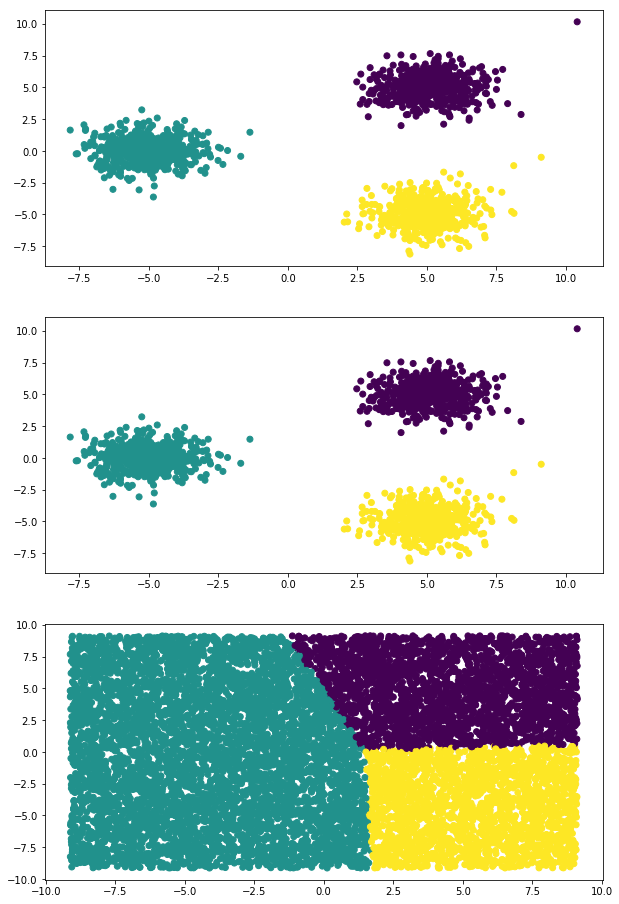

In [567]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.scatter(Data[:,0],Data[:,1],c=np.argmax(Data[:,2:],axis=1))
plt.subplot(3,1,2)
plt.scatter(Data[:,0],Data[:,1],c=np.argmax(model.predict(Data[:,:2]),axis=1))
plt.subplot(3,1,3)
plt.scatter(simX[:,0],simX[:,1],c=np.argmax(simOutput,axis=1))

In [450]:
model.__dict__

{'Costs': [1.8003839092766922,
  3.4794682106307206,
  1.967791628023462,
  2.336194537362214,
  1.836491511920481,
  2.1070761164327223,
  2.4046816008423835,
  2.014945079263517,
  1.8499040301134386,
  2.038397108612492,
  1.7914386745153184,
  2.1015676252540034,
  1.797631304191551,
  1.748029451689803,
  2.2118557564734735,
  1.9944721950015785,
  1.6359870234859801,
  1.7268493835345322,
  1.8025409140154922,
  1.893815163975106,
  1.5697430378292545,
  1.5702845635739653,
  2.0349768595999094,
  1.8376943692321612,
  1.803772661337474,
  1.8588311601385263,
  1.5894994654137111,
  1.471657589677721,
  1.5372868642369915,
  1.3449660763478013,
  1.3607767016862506,
  1.6931495830299932,
  1.4294598916767822,
  1.397367443749689,
  1.43769360707429,
  1.5422296867665672,
  1.7956026077596388,
  1.509455615535069,
  1.3275512381317078,
  1.263325386984149,
  1.2417001753786259,
  1.6665786975865164,
  1.4841796953731008,
  1.2600231125640071,
  1.3217809170113792,
  1.115835355644